In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [142]:
#Bring the data in 
loandata = pd.read_csv("CleanLoanData.csv")

/home/pizzle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
list(loandata)

['Unnamed: 0',
 'member_id',
 'loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'issue_d',
 'loan_status',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'revol_bal',
 'total_acc',
 'acc_now_delinq',
 'GoodBadLoan']

In [146]:
loandata.describe()

,Unnamed: 0,member_id,loan_amnt,installment,annual_inc,dti,open_acc,revol_bal,total_acc,acc_now_delinq
count,887383.000000,8.873820e+05,887382.000000,887382.000000,8.873780e+05,887382.00000,887353.000000,8.873820e+05,887353.000000,887353.000000
mean,443691.000000,3.500184e+07,14755.280082,436.717647,7.502761e+04,18.15702,11.548471,1.692076e+04,25.268032,0.004991
std,256165.551298,2.411336e+07,8435.456408,244.186619,6.469823e+04,17.19060,5.317310,2.242676e+04,11.840553,0.077625
min,0.000000,7.047300e+04,500.000000,15.670000,0.000000e+00,0.00000,0.000000,0.000000e+00,1.000000,0.000000
25%,221845.500000,1.087713e+07,8000.000000,260.710000,4.500000e+04,11.91000,8.000000,6.443000e+03,17.000000,0.000000
50%,443691.000000,3.709528e+07,13000.000000,382.550000,6.500000e+04,17.65000,11.000000,1.187500e+04,24.000000,0.000000
75%,665536.500000,5.847135e+07,20000.000000,572.600000,9.000000e+04,23.95000,14.000000,2.082900e+04,32.000000,0.000000
max,887382.000000,7.354484e+07,35000.000000,1445.460000,9.500000e+06,9999.00000,90.000000,2.904836e+06,169.000000,14.000000


In [91]:
loandata['loan_amnt'] = loandata['loan_amnt'].astype(float)
loandata['loan_amnt'].describe()

count    887382.000000
mean      14755.280082
std        8435.456408
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [100]:
loandata['int_rate'] = loandata['int_rate'].map(lambda t: str(t).lstrip(' ').rstrip('%'))
loandata['int_rate'] = loandata['int_rate'].astype(float)


In [6]:
loandata.describe()

,Unnamed: 0,member_id,loan_amnt,installment,annual_inc,dti,open_acc,revol_bal,total_acc,acc_now_delinq
count,887383.000000,8.873820e+05,887382.000000,887382.000000,8.873780e+05,887382.00000,887353.000000,8.873820e+05,887353.000000,887353.000000
mean,443691.000000,3.500184e+07,14755.280082,436.717647,7.502761e+04,18.15702,11.548471,1.692076e+04,25.268032,0.004991
std,256165.551298,2.411336e+07,8435.456408,244.186619,6.469823e+04,17.19060,5.317310,2.242676e+04,11.840553,0.077625
min,0.000000,7.047300e+04,500.000000,15.670000,0.000000e+00,0.00000,0.000000,0.000000e+00,1.000000,0.000000
25%,221845.500000,1.087713e+07,8000.000000,260.710000,4.500000e+04,11.91000,8.000000,6.443000e+03,17.000000,0.000000
50%,443691.000000,3.709528e+07,13000.000000,382.550000,6.500000e+04,17.65000,11.000000,1.187500e+04,24.000000,0.000000
75%,665536.500000,5.847135e+07,20000.000000,572.600000,9.000000e+04,23.95000,14.000000,2.082900e+04,32.000000,0.000000
max,887382.000000,7.354484e+07,35000.000000,1445.460000,9.500000e+06,9999.00000,90.000000,2.904836e+06,169.000000,14.000000


In [18]:
stateCounts.describe()

count        51.000000
mean      17399.647059
std       23109.205440
min          12.000000
25%        3856.000000
50%       10893.000000
75%       20812.500000
max      129518.000000
Name: addr_state, dtype: float64

In [76]:
stateCounts = []

In [77]:
#Is there a geographic correlation to the data? Zip Code and State? 
stateCounts = loandata.addr_state.value_counts()
goods_per_state= loandata[loandata['GoodBadLoan']==True].addr_state.value_counts()

perc_per_state = (stateCounts.ix[:]- goods_per_state.ix[:])/stateCounts.ix[:]
perc_per_state = perc_per_state.sort_values(ascending = True)
print(perc_per_state)
#perc_per_state
#perc_per_state
#plt.pie(perc_per_state)
#plt.hist(goods_per_state, label='Goods in Each State')
#plt.legend(loc='upper right')
#plt.show()

ME    0.001905
ND    0.008351
NE    0.020408
DC    0.048520
MS    0.052632
VT    0.054535
NH    0.057056
WY    0.057692
WV    0.060192
KS    0.061948
CO    0.063115
IL    0.063649
SC    0.063728
MT    0.065285
TX    0.066898
WI    0.067306
CT    0.068140
AK    0.068481
IN    0.069693
KY    0.070643
GA    0.070859
OR    0.071238
TN    0.071623
OH    0.072053
WA    0.072450
MA    0.073954
MN    0.074137
MI    0.074614
RI    0.075006
DE    0.075269
MO    0.076300
AR    0.076355
PA    0.076386
AZ    0.077454
SD    0.077686
NC    0.079733
MD    0.080025
NJ    0.080647
LA    0.080759
UT    0.080939
CA    0.081209
NM    0.081393
OK    0.082251
VA    0.082537
ID    0.083333
FL    0.084483
NY    0.084888
AL    0.088661
HI    0.093435
NV    0.094270
IA    0.214286
Name: addr_state, dtype: float64


Almost 20% of loans from people originating in Iowa are bad. North Dakota have a very low rate of bads. All other states are between 10% and 2%. 

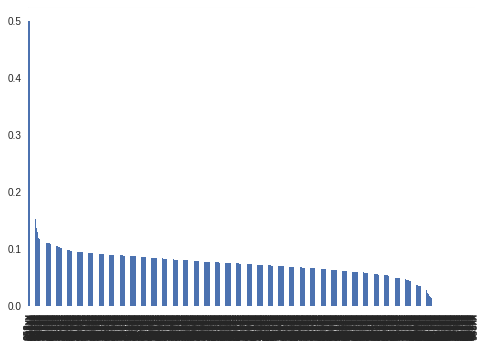

In [102]:
zipCounts = loandata.zip_code.value_counts()
goods_per_zip= loandata[loandata['GoodBadLoan']==True].zip_code.value_counts()

perc_per_state = (zipCounts.ix[:]- goods_per_zip.ix[:])/zipCounts.ix[:]
perc_per_state = perc_per_state.sort_values(ascending = False)
perc_per_st_plot = perc_per_state.plot(kind='bar')

There seems to bea few counties that have a high probability of bad loans for specific zip codes.  

In [ ]:
#Could any features be linearly related?

In [80]:
import re
re.sub("\D", "", "10+ years")

'10'

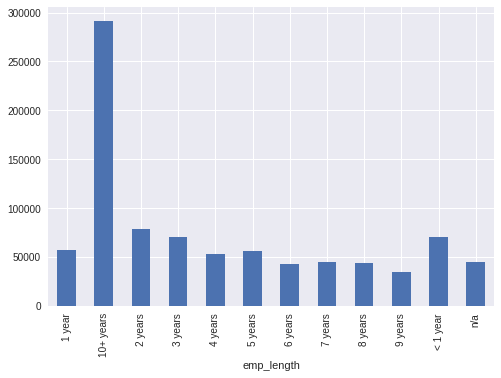

In [112]:
#Is there a relationship between employment length and the loan?

loans_group_empL = loandata.groupby('emp_length')
empL_counts = loans_group_empL.size()

my_plot = empL_counts.plot(kind='bar')

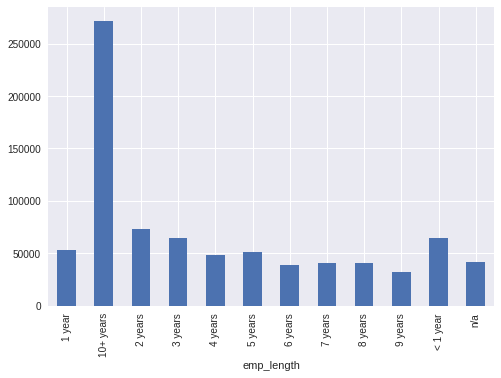

In [116]:
goodLoans = loandata[loandata['GoodBadLoan']==True]
gdLoans_gp_empL = goodLoans.groupby('emp_length')
gdLoans_grp = gdLoans_gp_empL.size()

my2_plot = gdLoans_grp.plot(kind='bar')

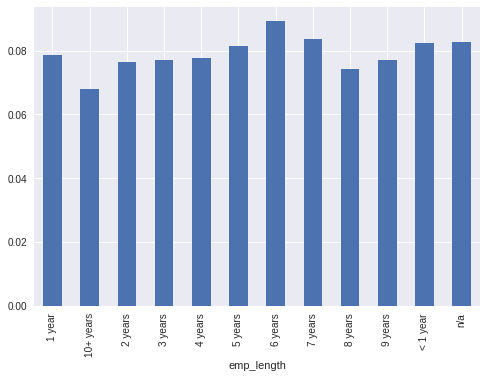

In [125]:
perc_emp_length = (empL_counts.ix[:] - gdLoans_grp.ix[:])/empL_counts.ix[:]
perc_emp_length.plot(kind='bar')

There is no significant difference in the employment length and predicting a bad loan. The mean percentage of bad loans for all employment lengths is 7%, and for all levels of employement it is within 1% of the mean. Although it is the lowest for those employed the longest, which makes sense. The highest default rate is 6 years of employment. 

In [134]:
#Is there a relationship between the amount of the loan and default?
bdLns = loandata[loandata['GoodBadLoan']==False]
bdLns.loan_amnt.describe()

count    67429.000000
mean     14858.564935
std       8471.158706
min        500.000000
25%       8325.000000
50%      13175.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

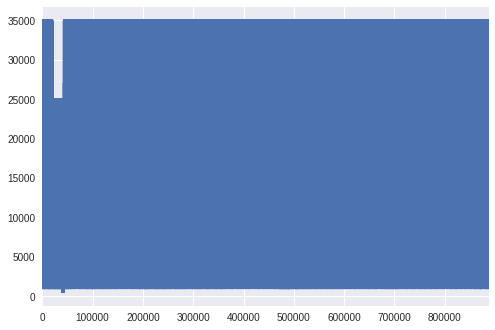

In [138]:
gdLns = loandata[loandata['GoodBadLoan']==True]
gdLns.loan_amnt.plot(kind='line')

In [ ]:
#What does int rates versus default look like?

In [ ]:
#What does annual income versus loan amount and default rate look like 

In [ ]:
#Are there months when loans are originated that tend to indicate bads? Christmas? 


In [ ]:
#How does debt to income ratio, annual income, loan amount and interest rate relate, inq_last 6mths, open accs, revol_bal, revol_util? 

In [ ]:
#Is earliest cr line of interest? 

In [141]:
loandata.home_ownership.unique()print(homeown_counts)print(homeown_counts)

array([nan, 'ANY'], dtype=object)

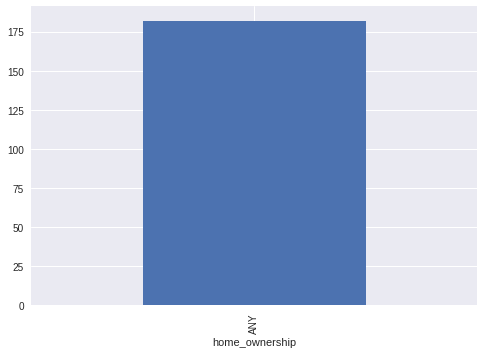

In [145]:
#How does home ownership indicate a loan status or value? 
loans_group_homeown = loandata.groupby('home_ownership')
homeown_counts = loans_group_homeown.size()

my_plot = homeown_counts.plot(kind='bar')

In [149]:
#How is lending club loans grown?

loanbook$issue_d <- as.Date(gsub("^", "01-", loanbook$issue_d), format="%d-%b-%Y")

amnt_df <- loanbook %>% 
  select(issue_d, loan_amnt) %>% 
  group_by(issue_d) %>% 
  summarise(Amount = sum(loan_amnt))

ts_amnt <- ggplot(amnt_df, 
                  aes(x = issue_d, y = Amount))
ts_amnt + geom_line() + xlab("Date issued")

In [160]:
loandata = loandata.groupby('issue_d')

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [159]:
loandata['sum'] = loandata['loan_amnt'].groupby(loandata['issue_d']).transform('sum')

AttributeError: Cannot access callable attribute 'groupby' of 'SeriesGroupBy' objects, try using the 'apply' method

In [174]:
#loandata.int_rate = 
loandata.int_rate = loandata.int_rate.apply(lambda x: x.str.rstrip('%').astype(float))
#loandata.loan_amnt = loandata.loan_amnt.(float)

In [176]:
loandata.loan_amnt = loandata.loan_amnt.apply(lambda x: x.astype(float))

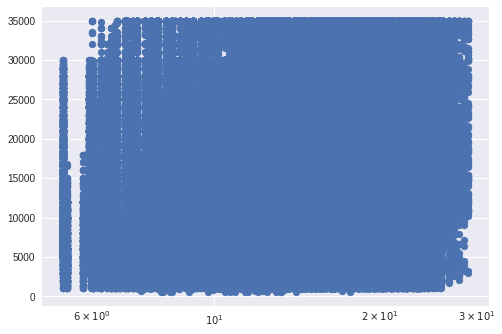

In [198]:
plt.scatter(loandata.int_rate, loandata.loan_amnt)
plt.xscale('log')
plt.show()

In [182]:
loandata.annual_inc = loandata.annual_inc.apply(lambda x: x.astype(float))

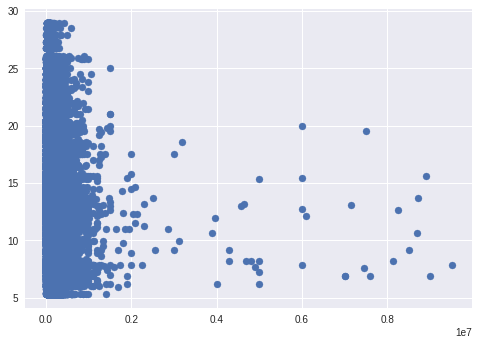

In [183]:
plt.scatter(loandata.annual_inc, loandata.int_rate)
plt.show()

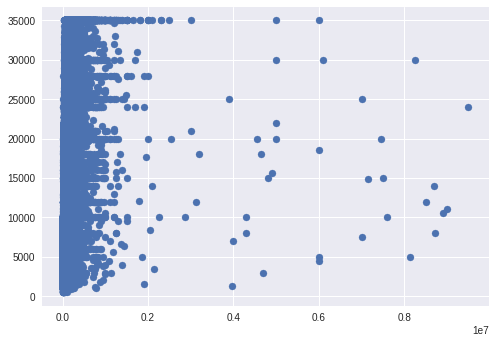

In [185]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.show()

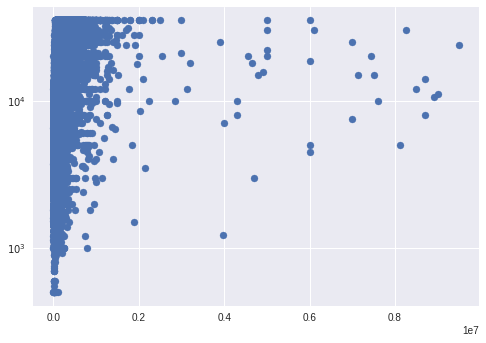

In [193]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.yscale('log')
plt.show()

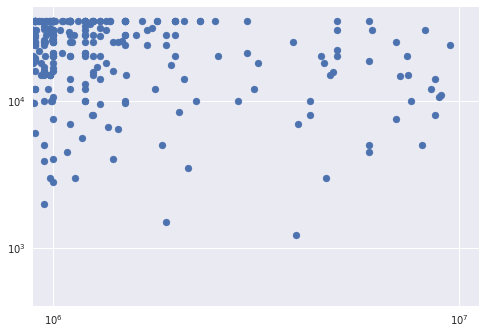

In [195]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.xscale('log')
plt.yscale('log')
plt.show()